# Beating the IQ Tester

## TODO:
* extend invalid move msg with exact error
* find way to list all next moves

In [1]:
# TODO : find way to make triangle with variable size

In [1]:
import numpy as np

grid = [
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1]]
grid = np.array(grid)

In [3]:
grid[(0,4)]

1

In [7]:
np.where(grid > 0)

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]),
 array([4, 3, 5, 2, 4, 6, 1, 3, 5, 7, 0, 2, 4, 6, 8]))

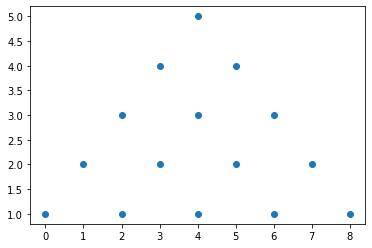

In [14]:
import matplotlib.pyplot as plt
plt.scatter(8 - np.where(grid > 0)[1], 5 - np.where(grid > 0)[0])

In [15]:
# TODO: Function that calculates all possible moves given a certain configuration
# TODO: find suitable way for best sequence of moves

## Move Class

This struct describes a move on the board.
Each move is described by :
+ pin : the pin that will be moved
+ pin_dst: destination of the pin 

In [42]:
class Move():
    translate_move = {(1,1):(0,4), 
                      (2,1):(1,3), (2,2):(1,5),
                      (3,1):(2,2), (3,2):(2,4), (3,3):(2,6),
                      (4,1):(3,1), (4,2):(3,3), (4,3):(3,5), (4,4):(3,7),
                      (5,1):(4,0), (5,2):(4,2), (5,3):(4,4), (5,4):(4,6), (5,5):(4,8)}
    def __init__(self, pin_src, pin_dst):
        self.pin_src = self.translate_move[pin_src]
        if pin_src is not None:
            self.pin_src = self.translate_move[pin_src]
        else:
            self.pin_src = pin_src
        if pin_dst is not None:
            self.pin_dst = self.translate_move[pin_dst]
        else: 
            self.pin_dst = pin_dst
        


## GameBoard Class

This class describes the board of the game.

The class shoud have the following methods and members:
+ plot() : plots the game board
+ config : current configuration of the board (position of the pins)
+ next_moves(): returns a list with all the possible next moves


In [68]:
import numpy as np
import matplotlib.pyplot as plt

class GameBoard():
    mask =np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 1, 0, 0, 0],
           [0, 0, 1, 0, 1, 0, 1, 0, 0],
           [0, 1, 0, 1, 0, 1, 0, 1, 0],
           [1, 0, 1, 0, 1, 0, 1, 0, 1]])
    def __init__(self):
        self.grid =[[0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 1, 0, 1, 0, 0],
                   [0, 1, 0, 1, 0, 1, 0, 1, 0],
                   [1, 0, 1, 0, 1, 0, 1, 0, 1]]
        self.grid = np.array(self.grid)
    
    def show_board(self):
        """
        plots the game board as a scatter plot
        """
        plt.scatter( np.where(self.grid > 0)[1], 5 - np.where(self.grid > 0)[0], s=200, c='g')
        plt.xlim([-1, 9])
        plt.ylim([0, 6])
        plt.axis('off')
        
    def remaining_pins(self):
        """
        returns the number of remaining pins
        """
        return np.sum(self.grid)
    
    def pin_in_grid(self, pin):
        """
        check that pin has valid poision
        """
        if pin is not None:
            # check if source of pin are in the grid
            if (any((v < 0) for v in pin)):
                return False
            if (pin[0] > 4 or pin[1] > 8):
                return False
            
            # check if destination are in valid positions
            if (self.mask[pin] == 0):
                return False
        return True
        
    def valid_move(self, move):
        """
        checks if a move is valid
        """
        # check that the source has a valid position
        if self.pin_in_grid(move.pin_src) is not True:
            return False
        
        # check that the destination has a valid position
        if self.pin_in_grid(move.pin_dst) is not True:
            return False
            
        
        # the first move must have None as destination
        if self.remaining_pins() == 15:
            if (move.pin_dst == None):
                return True
            else:
                return False
            
        # the distance covered by the move must be exactly 4
        if not self.move_dist(move) == 4:
            return False
                
        # check the destination is empty and a pin will be removed
        if self.grid[move.pin_dst] == 0 and self.grid[self.find_middle_pin(move)] == 1:
            return True
        return False
    def do_move(self, move):
        """
        excecutes a move on game board
        """
        if not self.valid_move(move):
            print("INVALID MOVE!")
            return
        pin_src = move.pin_src
        pin_dst = move.pin_dst
        
        self.grid[pin_src] = 0
        if pin_dst is not None:
            self.grid[pin_dst] = 1
            self.grid[self.find_middle_pin(move)] = 0
    
    def next_moves(self):
        """
        lists all the possible next moves for all the pins
        """
        next_moves = []
        pin_idx = np.where(self.grid == 1)
        for i in range(len(pin_idx[0])):
            next_i = [(pin_idx[0][i],pin_idx[1][i])]
            next_i.extend(self.next_dst((pin_idx[0][i],pin_idx[1][i])))
            next_moves.append(next_i)
            
        return next_moves
    
    def next_dst(self, pin_src):
        """ 
        returns a list with all the possible destination for a given source
        """
        possible_dsts = []
        temp_dst = []
        pin_x = pin_src[0]
        pin_y = pin_src[1]
        
        # if first move : None is the only possible destination
        if self.remaining_pins() == 15:
            possible_dsts.append(None)
            
       
        # if not first move
        temp_dst.append((pin_x + 2, pin_y + 2))
        temp_dst.append((pin_x + 2, pin_y - 2))
        temp_dst.append((pin_x - 2, pin_y + 2))
        temp_dst.append((pin_x - 2, pin_y - 2))
        temp_dst.append((pin_x, pin_y + 4))
        temp_dst.append((pin_x, pin_y - 4))
        temp_dst.append((pin_x + 4, pin_y))
        temp_dst.append((pin_x - 4, pin_y))
        
        for possible_dst in temp_dst:
            if self.pin_in_grid(possible_dst) and self.grid[possible_dst] == 0:
                possible_dsts.append(possible_dst)
            
        return possible_dsts 
        
    
    def find_middle_pin(self,move):
        """
        returns the pin between the source and destination of a move 
        """
        return ((move.pin_src[0] + move.pin_dst[0]) // 2, (move.pin_src[1] + move.pin_dst[1]) // 2) 
    def move_dist(self, move):
        """
        returns the distance covered by a pin 
        """
        return np.abs(move.pin_src[0] - move.pin_dst[0]) + np.abs(move.pin_src[1] - move.pin_dst[1])

15

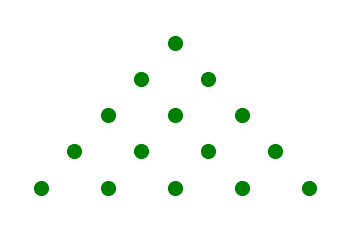

In [73]:
game = GameBoard()
game.show_board()
game.remaining_pins()



In [72]:
#game.next_dst((1,5))
game.next_moves()

[[(1, 3)],
 [(1, 5)],
 [(2, 2), (0, 4)],
 [(2, 4)],
 [(2, 6), (0, 4)],
 [(3, 1)],
 [(3, 3)],
 [(3, 5)],
 [(3, 7)],
 [(4, 0)],
 [(4, 2)],
 [(4, 4), (0, 4)],
 [(4, 6)],
 [(4, 8)]]

14

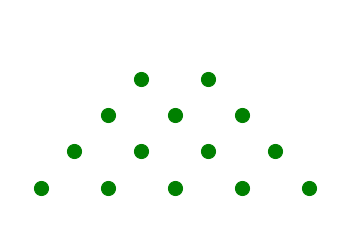

In [74]:
game.do_move(Move((1,1), None))
game.show_board()
game.remaining_pins()

11

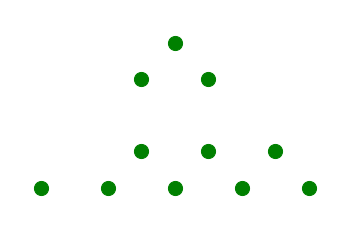

In [78]:
game.do_move(Move((4,1), (2,1)))
game.show_board()
game.remaining_pins()

In [79]:
game.next_moves()

[[(0, 4), (2, 6), (2, 2)],
 [(1, 3), (3, 1)],
 [(1, 5)],
 [(3, 3)],
 [(3, 5), (3, 1)],
 [(3, 7)],
 [(4, 0), (2, 2)],
 [(4, 2), (2, 4)],
 [(4, 4), (2, 6), (2, 2)],
 [(4, 6), (2, 4)],
 [(4, 8), (2, 6)]]

In [48]:
game.grid[(0,4)]

1

INVALID MOVE!


13

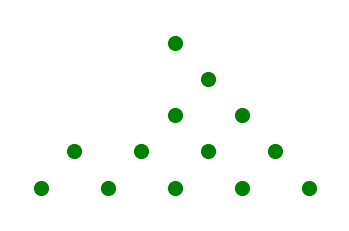

In [49]:
game.do_move(Move((1,1), (2,1)))
game.show_board()
game.remaining_pins()